In [ ]:
#DATE: 03/09/25
#DAY: Wednesday

## LabSheet6: HYPERPARAMETER TUNING IN NURAL NETWORKS

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [13]:
# functions to build model with huperparameters
def build_model(hidden_units, learning_rate):
  model=models.Sequential([
  tf.keras.Input(shape=(784,)),
  layers.Dense(hidden_units, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
  ])
  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [9]:
#3. Hyperparameter configuration to test
configs=[
    {'hidden_units': 128, 'learning_rate': 0.001,'batch_size':32},
    {'hidden_units': 128, 'learning_rate': 0.001,'batch_size':64},
    {'hidden_units': 128, 'learning_rate': 0.01,'batch_size':64},
    {'hidden_units': 256, 'learning_rate': 0.001,'batch_size':128},
]
history_results={}
test_results={}

In [15]:
# Train and evaluate models
for cfg in configs:
  print(f"\nTraining with config: {cfg}")
  model=build_model(cfg['hidden_units'], cfg['learning_rate'])
  history=model.fit(x_train, y_train, epochs=5, batch_size=cfg['batch_size'],
                    validation_split=0.2,
                    verbose=1)
  history_results[str(cfg)]=history.history
  test_loss, test_acc=model.evaluate(x_test, y_test,verbose=1)
  test_results[str(cfg)]= test_acc
  print(f"Test Accuracy:{test_acc:.4f}")


Training with config: {'hidden_units': 128, 'learning_rate': 0.001, 'batch_size': 32}
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8585 - loss: 0.4832 - val_accuracy: 0.9622 - val_loss: 0.1359
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9629 - loss: 0.1209 - val_accuracy: 0.9636 - val_loss: 0.1182
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9755 - loss: 0.0782 - val_accuracy: 0.9674 - val_loss: 0.1096
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9826 - loss: 0.0556 - val_accuracy: 0.9673 - val_loss: 0.1081
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9861 - loss: 0.0449 - val_accuracy: 0.9755 - val_loss: 0.0903
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0963
Test Accuracy:0.9742

Training with config: {'hidden_units': 128, 'learning_rate': 0.001, 'batch_size': 64}
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8318 - loss: 0.5

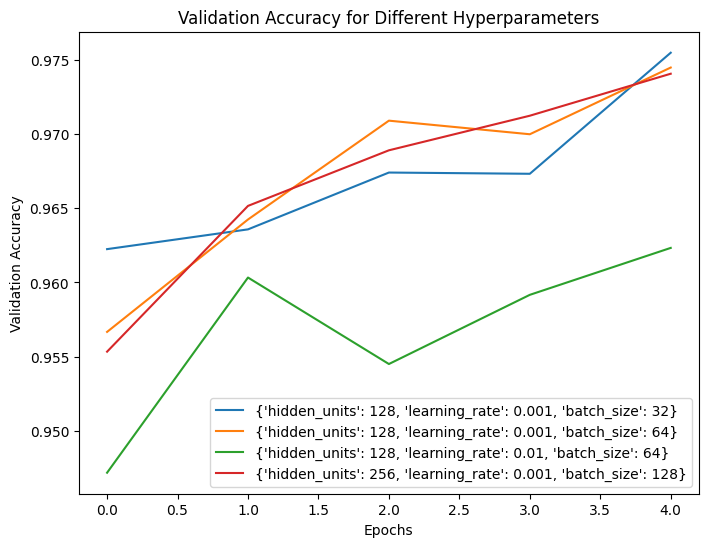

In [21]:
#5 plot Validation Accuracy Curves
plt.figure(figsize=(8,6))
for cfg, hist in history_results.items():
  plt.plot(hist['val_accuracy'],label=cfg)
plt.title('Validation Accuracy for Different Hyperparameters')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()


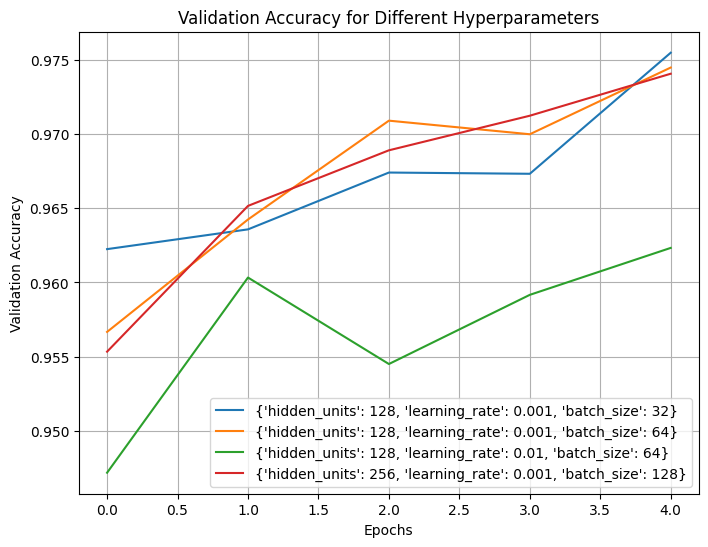

In [22]:
#5 plot Validation Accuracy Curves
plt.figure(figsize=(8,6))
for cfg, hist in history_results.items():
  plt.plot(hist['val_accuracy'],label=cfg)
plt.title('Validation Accuracy for Different Hyperparameters')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
#6 Final comparision Table
print("Final Test AccuracyComparision")
for cfg,acc in test_results.items():
  print(f"{cfg}: {acc:.4f}")

Final Test AccuracyComparision
{'hidden_units': 128, 'learning_rate': 0.001, 'batch_size': 32}: 0.9742
{'hidden_units': 128, 'learning_rate': 0.001, 'batch_size': 64}: 0.9739
{'hidden_units': 128, 'learning_rate': 0.01, 'batch_size': 64}: 0.9631
{'hidden_units': 256, 'learning_rate': 0.001, 'batch_size': 128}: 0.9763
